# Torontos Neighborhoods

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.4                |           py36_0         877 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         877 KB

The following packages will be UPDATED:

  conda                                        4.6.3-py36_0 --> 4.6.4-py36_0



conda-4.6.4          | 877 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed
Libraries imported.


In [2]:
#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize

In [3]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
 !conda install -c conda-forge pydotplus -y
 !conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          23 KB

The following packages will be UPDATED:

  pydotplus          anaconda/linux-64::pydotplus-2.0.2-py~ --> conda-forge/noarch::pydotplus-2.0.2-py_2



pydotplus-2.0.2      | 23 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    pac

In [87]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [88]:
# Library for extracting info from websites, pandas and numpy
import requests
import pandas as pd
import numpy as np
import random # library for random number generation

## We import all the dataframes previously obtained

In [89]:
newrest=pd.read_csv('newrest.csv',header=0,index_col=0)

In [90]:
newrest.head()

,Postalcode,name,categories,address,crossStreet,distance,lat,lng,id,numbertips,rating,profitrate,AmericanRestaurant,Breakfast Spot,OtherRestaurant,AsianRestaurant,Bar/Club,PedVol,VehVol
0,M5B,Subway,Sandwich Place,10 Dundas St. E,at Yonge St.,188.0,43.656260,-79.380920,4c6abb8c2c29d13ad2720e41,3.0,5.8,17.4,1,0,0,0,0,34615,10925
1,M5K,Epic,Wine Bar,100 Front Street West,NaN,187.0,43.645515,-79.381239,4ad4c05df964a5203af620e3,28.0,6.9,193.2,0,0,0,0,1,17564,16857
2,M5K,McDonald's,Fast Food Restaurant,61 Front St. W.,in Union Station,182.0,43.646146,-79.379822,4b8d36f8f964a520c7ed32e3,8.0,4.7,37.6,1,0,0,0,0,17115,18965
3,M5L,Ninki Sushi,Japanese Restaurant,40 King St W,at Bay St,181.0,43.649812,-79.379518,4beb2c0ba9900f475b7a1740,15.0,5.7,85.5,0,0,0,1,0,11224,12454
4,M5L,Over Easy,Breakfast Spot,56 Yonge St,at Melinda St,179.0,43.648077,-79.377599,4b06e099f964a52002f222e3,32.0,7.7,246.4,0,1,0,0,0,26656,13620


In [91]:
restlist=pd.read_csv('restlist.csv',header=0,index_col=0)

In [92]:
onlytoronto=pd.read_csv('onlytoronto.csv',header=0,index_col=0)

In [93]:
catrest=pd.read_csv('catrest.csv',header=0,index_col=0)

In [94]:
fullrest=pd.read_csv('fullrest.csv',header=0,index_col=0)

In [95]:
hotfullrest=pd.read_csv('hotfullrest.csv',header=0,index_col=0)

In [96]:
tidyrest=pd.read_csv('tidyrest.csv',header=0,index_col=0)

In [97]:
torontotraff=pd.read_csv('torontotraff.csv',header=0,index_col=0)

In [98]:
restdentoronto=pd.read_csv('restdentoronto.csv',header=0,index_col=0)

In [99]:
print(onlytoronto.shape)
print(torontotraff.shape)

(38, 8)
(103, 7)


### We plot a map of Toronto with those Boroughs that contain the word 'Toronto' in it

In [100]:
latitude=43.7
longitude= -79.4

toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the Conrad Hotel

# add the Boroughs as blue circle markers
for lat, lng, label in zip(onlytoronto.Latitude, onlytoronto.Longitude, onlytoronto.Borough):
        # We restrict to those Boroughs that contain the word Toronto
        #Reason, if I leave all Boroughs the map doesn't load
        #Try in a future with a larger subset
            folium.features.CircleMarker(
                [lat, lng],
                radius=2,
                color='blue',
                popup=label,
                fill = True,
                fill_color='blue',
                fill_opacity=0.6
            ).add_to(toronto_map)
# display map
toronto_map

### Now we reprint our map representing each cluster with a colour and adding the number of restaurants to the label

In [101]:
toronto_restaurant_dense_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the Conrad Hotel

group0 =folium.FeatureGroup(name='<span style=\\"color: blue;\\"> Low Restaurant Count</span>')
group1 =folium.FeatureGroup(name='<span style=\\"color: red;\\">High Restaurant Count</span>')
group2 =folium.FeatureGroup(name='<span style=\\"color: green;\\">Mid Restaurant Count</span>')

for lat, lng, bor, count, label in zip(restdentoronto.Latitude, restdentoronto.Longitude, restdentoronto.Borough, restdentoronto.NumberRestaurants, restdentoronto.labels):
        # We restrict to those Boroughs that contain the word Toronto
        #Reason, if I leave all Boroughs the map doesn't load
        #Try in a future with a larger subset
            if label==0:
                clr='blue'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=bor+', '+str(count)+ ' restaurants',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(group0)
            elif label==1:
                clr='red'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=bor+', '+str(count)+ ' restaurants',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(group1)
            elif label==2:
                clr='green'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=bor+', '+str(count)+ ' restaurants',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(group2)
group0.add_to(toronto_restaurant_dense_map)
group2.add_to(toronto_restaurant_dense_map)
group1.add_to(toronto_restaurant_dense_map)


folium.LayerControl('topright', collapsed=False).add_to(toronto_restaurant_dense_map)

# display map
toronto_restaurant_dense_map

In [102]:
restdentoronto.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,VehVol,PedVol,NumberRestaurants,labels,labels2
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,12703.153846,2070.000000,0.0,1,0
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,12302.062500,3862.875000,0.0,1,0
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,11970.444444,1488.777778,0.0,1,0
3,M4M,East Toronto,Studio District,43.659526,-79.340923,11335.000000,1715.240000,0.0,1,0
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,19865.333333,725.333333,0.0,1,2


### Now we print a map of the traffic density in toronto

In [103]:
toronto_traffic_dense_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

group0 =folium.FeatureGroup(name='<span style=\\"color: blue;\\"> High Vehicule, Low pedestrian</span>')
group1 =folium.FeatureGroup(name='<span style=\\"color: red;\\">Mid Vehicule, Low pedestrian</span>')
group2 =folium.FeatureGroup(name='<span style=\\"color: green;\\">High Vehicule, High pedestrian</span>')
group3 =folium.FeatureGroup(name='<span style=\\"color: orange;\\"> Mid Vehicule, Mid pedestrian</span>')

for lat, lng, bor, veh, ped, label in zip(restdentoronto.Latitude, restdentoronto.Longitude, restdentoronto.Borough, restdentoronto.VehVol, restdentoronto.PedVol, restdentoronto.labels2):
        # We restrict to those Boroughs that contain the word Toronto
        #Reason, if I leave all Boroughs the map doesn't load
        #Try in a future with a larger subset
        
            if label==0:
                clr='blue'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=2,
                    color=clr,
                    popup=bor+', '+str(int(veh))+ ' veh, '+str(int(ped))+' ped',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(group0)
            elif label==1:
                clr='red'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=2,
                    color=clr,
                    popup=bor+', '+str(int(veh))+ ' veh, '+str(int(ped))+' ped',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(group1)
            elif label==2:
                clr='green'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=2,
                    color=clr,
                    popup=bor+', '+str(int(veh))+ ' veh, '+str(int(ped))+' ped',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(group2)
            elif label==3:
                clr='orange'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=2,
                    color=clr,
                    popup=bor+', '+str(int(veh))+ ' veh, '+str(int(ped))+' ped',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(group3)
            elif label==4:
                clr='olivedrab1'
            elif label==5:
                clr='yellow'
            elif label==6:
                clr='turquise'
            elif label==7:
                clr='red'
            else:
                clr='black'
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=2,
                    color=clr,
                    popup=bor+', '+str(int(veh))+ ' veh, '+str(int(ped))+' ped',
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.6
                ).add_to(toronto_traffic_dense_map)
group0.add_to(toronto_traffic_dense_map)
group1.add_to(toronto_traffic_dense_map)
group2.add_to(toronto_traffic_dense_map)
group3.add_to(toronto_traffic_dense_map)

folium.LayerControl('topright', collapsed=False).add_to(toronto_traffic_dense_map)

# display map
toronto_traffic_dense_map

### Now we use multiple regression to see which category of restaurant is most succesfull

In [104]:
msk = np.random.rand(len(tidyrest)) < 0.5
train = tidyrest[msk]
test = tidyrest[~msk]

In [105]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
#these might change depending on the categories of the foursquare search
x = np.asanyarray(train[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club']])
y = np.asanyarray(train[['profitrate']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-166.20066667 -215.234       259.23266667  -36.114       158.316     ]]


In [106]:
#these might change depending on the categories of the foursquare search
y_hat= regr.predict(test[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club']])
x = np.asanyarray(test[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club']])
y = np.asanyarray(test[['profitrate']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 58625.41
Variance score: -1.06


In [107]:
#these might change depending on the categories of the foursquare search
hotfullrest=fullrest[['Postalcode', 'name', 'categories', 'address',
       'distance', 'lat', 'lng', 'id', 'numbertips', 'rating', 'profitrate',
       'AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club', 'Borough',
       'Neighborhood', 'VehVol', 'PedVol',
       'NumberRestaurants', 'labels', 'labels2']].copy()

### Now we include the vehicule and pedestrian traffic in to the equation, this will allow us to choose the best Neighborhood to place the restaurant

In [108]:
msk = np.random.rand(len(hotfullrest)) < 0.5
train = hotfullrest[msk]
test = hotfullrest[~msk]

In [109]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
#these might change depending on the categories of the foursquare search
x = np.asanyarray(train[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']])
y = np.asanyarray(train[['profitrate']])
regr.fit (x, y)
coefrest=regr.coef_
intercrest=regr.intercept_
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[-2.06892761e+02 -1.64900721e+02  3.07776660e+02  4.75358043e+01
   1.64810182e+01 -4.39897200e-02  2.04674853e-02]]
Intercept:  [578.08954261]


In [110]:
#these might change depending on the categories of the foursquare search
y_hat= regr.predict(test[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']])
x = np.asanyarray(test[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']])
y = np.asanyarray(test[['profitrate']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 84841.93
Variance score: -0.57


### This also allows to estimate how much would be earned in each neighborhood, and could be compared with the rental prices of the area

In [111]:
hotfullrest.head()

,Postalcode,name,categories,address,distance,lat,lng,id,numbertips,rating,...,OtherRestaurant,AsianRestaurant,Bar/Club,Borough,Neighborhood,VehVol,PedVol,NumberRestaurants,labels,labels2
0,M5B,Subway,Sandwich Place,10 Dundas St. E,188.0,43.656260,-79.380920,4c6abb8c2c29d13ad2720e41,3.0,5.8,...,0,0,0,Downtown Toronto,"Ryerson, Garden District",11362.473684,10737.789474,2.0,1,3
1,M5B,The Senator Restaurant,Diner,249 Victoria Street,170.0,43.655641,-79.379199,4ad7929cf964a520500c21e3,94.0,8.2,...,1,0,0,Downtown Toronto,"Ryerson, Garden District",11362.473684,10737.789474,2.0,1,3
2,M5K,Epic,Wine Bar,100 Front Street West,187.0,43.645515,-79.381239,4ad4c05df964a5203af620e3,28.0,6.9,...,0,0,1,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",13028.000000,24851.250000,4.0,2,1
3,M5K,McDonald's,Fast Food Restaurant,61 Front St. W.,182.0,43.646146,-79.379822,4b8d36f8f964a520c7ed32e3,8.0,4.7,...,0,0,0,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",13028.000000,24851.250000,4.0,2,1
4,M5K,Stratus,Restaurant,79 Wellington St W,126.0,43.646181,-79.380809,4b231e82f964a5208e5324e3,4.0,6.1,...,0,0,0,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",13028.000000,24851.250000,4.0,2,1


In [112]:
mx=hotfullrest['PedVol'].loc[hotfullrest['PedVol'].idxmax()]
mn=hotfullrest['PedVol'].loc[hotfullrest['PedVol'].idxmin()]
av=hotfullrest['VehVol'].mean()
print(mx,mn)

24851.25 6728.666666666668


In [113]:
rn=range(int(mn-1),int(mx+1))


In [114]:
#We choose which categorie to plot
plot=hotfullrest.loc[hotfullrest['AsianRestaurant']==1]
plot

,Postalcode,name,categories,address,distance,lat,lng,id,numbertips,rating,...,OtherRestaurant,AsianRestaurant,Bar/Club,Borough,Neighborhood,VehVol,PedVol,NumberRestaurants,labels,labels2
6,M5L,Ninki Sushi,Japanese Restaurant,40 King St W,181.0,43.649812,-79.379518,4beb2c0ba9900f475b7a1740,15.0,5.7,...,0,1,0,Downtown Toronto,"Commerce Court, Victoria Hotel",13945.500000,22863.125000,6.0,2,1
10,M5L,Ki Modern Japanese + Bar,Japanese Restaurant,181 Bay St,126.0,43.647103,-79.379390,4ae73054f964a5203ca921e3,59.0,8.4,...,0,1,0,Downtown Toronto,"Commerce Court, Victoria Hotel",13945.500000,22863.125000,6.0,2,1
12,M5T,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,167.0,43.654318,-79.398650,4ad4c060f964a5207ff720e3,93.0,7.5,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3
13,M5T,Pho Hung,Vietnamese Restaurant,350 Spadina Ave.,165.0,43.654434,-79.398883,4ad4c060f964a52056f720e3,76.0,7.8,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3
14,M5T,Sky Dragon Chinese Restaurant 龍翔酒樓,Dim Sum Restaurant,280 Spadina Ave.,158.0,43.652783,-79.398174,4b072e9df964a52009f922e3,21.0,6.2,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3
15,M5T,Swatow Restaurant 汕頭小食家,Chinese Restaurant,309 Spadina Ave.,156.0,43.653866,-79.398334,4ae29812f964a520288f21e3,51.0,7.9,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3
16,M5T,Canteen Restaurant,Chinese Restaurant,"280 Spadina Ave, Unit L, 2nd Fl.",149.0,43.652821,-79.398275,4ae7710bf964a52057ab21e3,6.0,5.5,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3
17,M5T,King's Noodle House 富豪麵家,Chinese Restaurant,296 Spadina Ave,148.0,43.653089,-79.398214,4ae74cfaf964a5202eaa21e3,55.0,7.2,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3
18,M5T,Dumpling House,Dumpling Restaurant,328 Spadina Avenue,140.0,43.653860,-79.398558,4b119787f964a520188023e3,62.0,8.1,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3
19,M5T,Saigon Lotus Restaurant,Vietnamese Restaurant,6 Saint Andrew St,139.0,43.654311,-79.399225,58a7c100076be13f60d1dff5,3.0,8.4,...,0,1,0,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",11029.589744,6728.666667,15.0,0,3


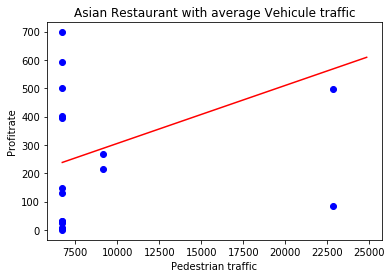

In [115]:
# We choose the appropiate coef corresponding to the categorie
plt.scatter(plot.PedVol, plot.profitrate,  color='blue')
#index of the regression line might change depending on the categories of the foursquare search
plt.plot(rn, intercrest[0]+ coefrest[0][3]+ av*coefrest[0][5]+ rn*coefrest[0][6] , '-r')
plt.xlabel("Pedestrian traffic")
plt.ylabel("Profitrate")
plt.title('Asian Restaurant with average Vehicule traffic')
plt.show()

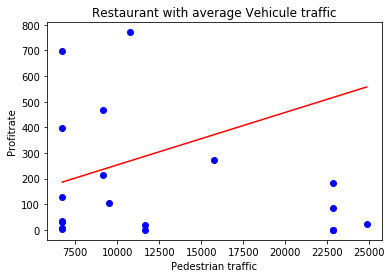

In [116]:

# We choose the appropiate coef corresponding to the categorie
plt.scatter(test.PedVol, test.profitrate,  color='blue')
#index of the regression line might change depending on the categories of the foursquare search
plt.plot(rn, intercrest[0]+ coefrest[0][0:4].mean()+ av*coefrest[0][5]+ rn*coefrest[0][6] , '-r')
plt.xlabel("Pedestrian traffic")
plt.ylabel("Profitrate")
plt.title('Restaurant with average Vehicule traffic')
plt.show()

### K Nearest Neighbour

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [118]:
#these might change depending on the categories of the foursquare search
X = hotfullrest[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']] .values  #.astype(float)
X[0:5]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.13624737e+04, 1.07377895e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.13624737e+04, 1.07377895e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.30280000e+04, 2.48512500e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.30280000e+04, 2.48512500e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.30280000e+04, 2.48512500e+04]])

In [119]:
y = hotfullrest['profitrate'].values.astype(int)
y[0:5]

array([ 17, 770, 193,  37,  24])

In [120]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.62368828, -0.22941573, -0.37796447, -0.85972695, -0.37796447,
        -0.54675819, -0.24828986],
       [-0.61588176, -0.22941573,  2.64575131, -0.85972695, -0.37796447,
        -0.54675819, -0.24828986],
       [-0.61588176, -0.22941573, -0.37796447, -0.85972695,  2.64575131,
         1.03215867,  1.80885533],
       [ 1.62368828, -0.22941573, -0.37796447, -0.85972695, -0.37796447,
         1.03215867,  1.80885533],
       [ 1.62368828, -0.22941573, -0.37796447, -0.85972695, -0.37796447,
         1.03215867,  1.80885533]])

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 7) (24,)
Test set: (16, 7) (16,)


In [122]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [123]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
[ 20 908  24 402  87]


In [124]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.20833333333333334
Test set Accuracy:  0.0


### K Nearest Neighbour isn't very accurrate in its predictions

### One of the issues is for each restaurant we are using the mean traffic in the borough, lets fix that

In [125]:
newrest.head()

,Postalcode,name,categories,address,crossStreet,distance,lat,lng,id,numbertips,rating,profitrate,AmericanRestaurant,Breakfast Spot,OtherRestaurant,AsianRestaurant,Bar/Club,PedVol,VehVol
0,M5B,Subway,Sandwich Place,10 Dundas St. E,at Yonge St.,188.0,43.656260,-79.380920,4c6abb8c2c29d13ad2720e41,3.0,5.8,17.4,1,0,0,0,0,34615,10925
1,M5K,Epic,Wine Bar,100 Front Street West,NaN,187.0,43.645515,-79.381239,4ad4c05df964a5203af620e3,28.0,6.9,193.2,0,0,0,0,1,17564,16857
2,M5K,McDonald's,Fast Food Restaurant,61 Front St. W.,in Union Station,182.0,43.646146,-79.379822,4b8d36f8f964a520c7ed32e3,8.0,4.7,37.6,1,0,0,0,0,17115,18965
3,M5L,Ninki Sushi,Japanese Restaurant,40 King St W,at Bay St,181.0,43.649812,-79.379518,4beb2c0ba9900f475b7a1740,15.0,5.7,85.5,0,0,0,1,0,11224,12454
4,M5L,Over Easy,Breakfast Spot,56 Yonge St,at Melinda St,179.0,43.648077,-79.377599,4b06e099f964a52002f222e3,32.0,7.7,246.4,0,1,0,0,0,26656,13620


### We will try running these models again

In [126]:
#these might change depending on the categories of the foursquare search
X = newrest[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']] .values.astype(float)
X[0:5]

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0925e+04, 3.4615e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.6857e+04, 1.7564e+04],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8965e+04, 1.7115e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.2454e+04, 1.1224e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3620e+04, 2.6656e+04]])

In [127]:
y = newrest['profitrate'].values.astype(int)
y[0:5]

array([ 17, 193,  37,  85, 246])

In [128]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.62368828e+00, -2.29415734e-01, -3.77964473e-01,
        -8.59726954e-01, -3.77964473e-01, -4.32870580e-01,
         1.52141289e+00],
       [-6.15881762e-01, -2.29415734e-01, -3.77964473e-01,
        -8.59726954e-01,  2.64575131e+00,  1.24167384e+00,
         7.22438514e-02],
       [ 1.62368828e+00, -2.29415734e-01, -3.77964473e-01,
        -8.59726954e-01, -3.77964473e-01,  1.83674121e+00,
         3.40832217e-02],
       [-6.15881762e-01, -2.29415734e-01, -3.77964473e-01,
         1.16316000e+00, -3.77964473e-01, -1.24913336e-03,
        -4.66594439e-01],
       [-6.15881762e-01,  4.35889894e+00, -3.77964473e-01,
        -8.59726954e-01, -3.77964473e-01,  3.27901034e-01,
         8.44975356e-01]])

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 7) (24,)
Test set: (16, 7) (16,)


In [130]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [131]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
[  5 673 246 396  24]


In [132]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.20833333333333334
Test set Accuracy:  0.0625


### Multiple Linear Regression

In [133]:
msk = np.random.rand(len(newrest)) < 0.5
train = newrest[msk]
test = newrest[~msk]

In [134]:
regr = linear_model.LinearRegression()
#these might change depending on the categories of the foursquare search
x = np.asanyarray(train[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']])
y = np.asanyarray(train[['profitrate']])
regr.fit (x, y)
coefrest=regr.coef_
intercrest=regr.intercept_
# The coefficients
print ('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[-1.91999519e+02 -2.21799543e+02  2.51759248e+02 -2.56108724e+01
   1.87650688e+02 -2.66238720e-02  9.05762066e-03]]
Intercept:  [474.84708988]


In [135]:
#these might change depending on the categories of the foursquare search
y_hat= regr.predict(test[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']])
x = np.asanyarray(test[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']])
y = np.asanyarray(test[['profitrate']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 86428.02
Variance score: -1.13


In [136]:
mx=newrest['PedVol'].loc[newrest['PedVol'].idxmax()]
mn=newrest['PedVol'].loc[newrest['PedVol'].idxmin()]
av=newrest['VehVol'].mean()
print(mx,mn)

47561 2635


In [137]:
rn=range(int(mn-1),int(mx+1))


In [138]:
#We choose which categorie to plot
plot=newrest.loc[newrest['AsianRestaurant']==1]
plot

,Postalcode,name,categories,address,crossStreet,distance,lat,lng,id,numbertips,rating,profitrate,AmericanRestaurant,Breakfast Spot,OtherRestaurant,AsianRestaurant,Bar/Club,PedVol,VehVol
3,M5L,Ninki Sushi,Japanese Restaurant,40 King St W,at Bay St,181.0,43.649812,-79.379518,4beb2c0ba9900f475b7a1740,15.0,5.7,85.5,0,0,0,1,0,11224,12454
7,M5T,Rol San Restaurant 龍笙棧,Dim Sum Restaurant,323 Spadina Ave.,at D'Arcy St.,167.0,43.654318,-79.398650,4ad4c060f964a5207ff720e3,93.0,7.5,697.5,0,0,0,1,0,2635,8810
8,M5T,Pho Hung,Vietnamese Restaurant,350 Spadina Ave.,at St Andrews St.,165.0,43.654434,-79.398883,4ad4c060f964a52056f720e3,76.0,7.8,592.8,0,0,0,1,0,2635,8810
12,M5T,Sky Dragon Chinese Restaurant 龍翔酒樓,Dim Sum Restaurant,280 Spadina Ave.,at Dundas St. W.,158.0,43.652783,-79.398174,4b072e9df964a52009f922e3,21.0,6.2,130.2,0,0,0,1,0,26960,11107
13,M5T,Swatow Restaurant 汕頭小食家,Chinese Restaurant,309 Spadina Ave.,btwn Dundas St. W & D'Arcy St.,156.0,43.653866,-79.398334,4ae29812f964a520288f21e3,51.0,7.9,402.9,0,0,0,1,0,2635,8810
14,M5T,Canteen Restaurant,Chinese Restaurant,"280 Spadina Ave, Unit L, 2nd Fl.",at Dundas St W,149.0,43.652821,-79.398275,4ae7710bf964a52057ab21e3,6.0,5.5,33.0,0,0,0,1,0,26960,11107
15,M5T,King's Noodle House 富豪麵家,Chinese Restaurant,296 Spadina Ave,at Dundas St W,148.0,43.653089,-79.398214,4ae74cfaf964a5202eaa21e3,55.0,7.2,396.0,0,0,0,1,0,26960,11107
18,M5T,Dumpling House,Dumpling Restaurant,328 Spadina Avenue,at Glenbaillie Pl,140.0,43.653860,-79.398558,4b119787f964a520188023e3,62.0,8.1,502.2,0,0,0,1,0,2635,8810
19,M5T,Saigon Lotus Restaurant,Vietnamese Restaurant,6 Saint Andrew St,Spadina Ave,139.0,43.654311,-79.399225,58a7c100076be13f60d1dff5,3.0,8.4,25.2,0,0,0,1,0,2635,8810
20,M5T,Ka Chi Korean Restaurant,Korean Restaurant,8 St Andrew St.,at Spadina Ave.,137.0,43.654307,-79.399277,4ba2d00cf964a5203e1b38e3,21.0,7.1,149.1,0,0,0,1,0,2635,8810


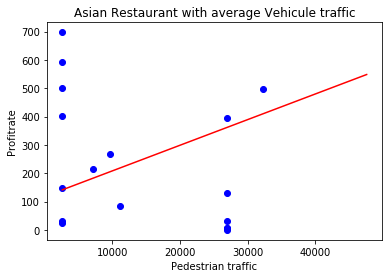

In [139]:
# We choose the appropiate coef corresponding to the categorie
plt.scatter(plot.PedVol, plot.profitrate,  color='blue')
plt.plot(rn, intercrest[0]+ coefrest[0][3]+ av*coefrest[0][5]+ rn*coefrest[0][6] , '-r')
plt.xlabel("Pedestrian traffic")
plt.ylabel("Profitrate")
plt.title('Asian Restaurant with average Vehicule traffic')
plt.show()

In [140]:
#We choose which categorie to plot
plot=newrest.loc[newrest['AmericanRestaurant']==1]
plot

,Postalcode,name,categories,address,crossStreet,distance,lat,lng,id,numbertips,rating,profitrate,AmericanRestaurant,Breakfast Spot,OtherRestaurant,AsianRestaurant,Bar/Club,PedVol,VehVol
0,M5B,Subway,Sandwich Place,10 Dundas St. E,at Yonge St.,188.0,43.656260,-79.380920,4c6abb8c2c29d13ad2720e41,3.0,5.8,17.4,1,0,0,0,0,34615,10925
2,M5K,McDonald's,Fast Food Restaurant,61 Front St. W.,in Union Station,182.0,43.646146,-79.379822,4b8d36f8f964a520c7ed32e3,8.0,4.7,37.6,1,0,0,0,0,17115,18965
10,M5L,Restaurant | Adelaide,Restaurant,325 Bay St (31st floor),NaN,164.0,43.649563,-79.380590,5a7c3e079de23b294a2c4117,0.0,5.0,0.0,1,0,0,0,0,28424,16489
11,M5H,Osgoode Hall Restaurant,New American Restaurant,130 Queen St W,University Ave,161.0,43.651979,-79.385049,4cffc78a75d3236a3b10e7f7,4.0,5.0,20.0,1,0,0,0,0,7961,8557
22,M5H,Barristers Bar,Restaurant,145 Richmond Street West,Hilton Toronto,131.0,43.649797,-79.385807,50ca02be245f2d4aa8c2ab5b,0.0,5.0,0.0,1,0,0,0,0,5525,20727
26,M5K,Stratus,Restaurant,79 Wellington St W,at Piper St,126.0,43.646181,-79.380809,4b231e82f964a5208e5324e3,4.0,6.1,24.4,1,0,0,0,0,32319,16188
27,M5C,B.L.D Restaurant,New American Restaurant,36 Toronto St,Adelaide,122.0,43.650832,-79.376639,4c38f3fc0a71c9b6f6ad41c9,8.0,5.0,40.0,1,0,0,0,0,18326,9968
31,M5H,Tundra Restaurant,Restaurant,145 Richmond Street West,Hilton Toronto,104.0,43.650010,-79.385608,50ca02c0245f2d4aa8c2b313,12.0,6.9,82.8,1,0,0,0,0,5525,20727
33,M5C,L'Apero Restaurant,Restaurant,81 Church Street,NaN,88.0,43.651820,-79.374410,4dff2649d22d48be8127cd1c,0.0,5.0,0.0,1,0,0,0,0,9692,13816
34,M5L,Jump,American Restaurant,18 Wellington St. W,btwn. Yonge St. and Bay St.,85.0,43.648147,-79.378752,4ad4c060f964a52057f720e3,24.0,7.6,182.4,1,0,0,0,0,32319,16188


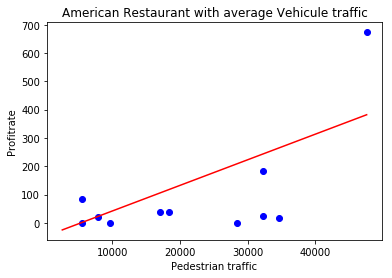

In [141]:
# We choose the appropiate coef corresponding to the categorie
plt.scatter(plot.PedVol, plot.profitrate,  color='blue')
plt.plot(rn, intercrest[0]+ coefrest[0][0]+ av*coefrest[0][5]+ rn*coefrest[0][6] , '-r')
plt.xlabel("Pedestrian traffic")
plt.ylabel("Profitrate")
plt.title('American Restaurant with average Vehicule traffic')
plt.show()

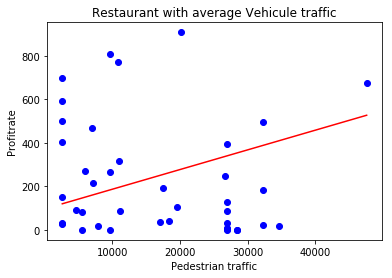

In [142]:

# We choose the appropiate coef corresponding to the categorie
plt.scatter(newrest.PedVol, newrest.profitrate,  color='blue')
plt.plot(rn, intercrest[0]+ coefrest[0][0:4].mean()+ av*coefrest[0][5]+ rn*coefrest[0][6] , '-r')
plt.xlabel("Pedestrian traffic")
plt.ylabel("Profitrate")
plt.title('Restaurant with average Vehicule traffic')
plt.show()

### K Nearest Neighbour

In [143]:
#these might change depending on the categories of the foursquare search
X = newrest[['AmericanRestaurant','Breakfast Spot','OtherRestaurant','AsianRestaurant','Bar/Club','VehVol', 'PedVol']] .values.astype(float)
X[0:5]

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0925e+04, 3.4615e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.6857e+04, 1.7564e+04],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8965e+04, 1.7115e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.2454e+04, 1.1224e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3620e+04, 2.6656e+04]])

In [144]:
y = newrest['profitrate'].values.astype(int)
y[0:5]

array([ 17, 193,  37,  85, 246])

In [145]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.62368828e+00, -2.29415734e-01, -3.77964473e-01,
        -8.59726954e-01, -3.77964473e-01, -4.32870580e-01,
         1.52141289e+00],
       [-6.15881762e-01, -2.29415734e-01, -3.77964473e-01,
        -8.59726954e-01,  2.64575131e+00,  1.24167384e+00,
         7.22438514e-02],
       [ 1.62368828e+00, -2.29415734e-01, -3.77964473e-01,
        -8.59726954e-01, -3.77964473e-01,  1.83674121e+00,
         3.40832217e-02],
       [-6.15881762e-01, -2.29415734e-01, -3.77964473e-01,
         1.16316000e+00, -3.77964473e-01, -1.24913336e-03,
        -4.66594439e-01],
       [-6.15881762e-01,  4.35889894e+00, -3.77964473e-01,
        -8.59726954e-01, -3.77964473e-01,  3.27901034e-01,
         8.44975356e-01]])

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 7) (24,)
Test set: (16, 7) (16,)


In [147]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [148]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
[  5 673 246 396  24]


In [149]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.20833333333333334
Test set Accuracy:  0.0625


### Even with the more precise data of traffic per restaurant, the improvement isn't great. KNN isn't a good approach for this problem

### Let's try a Decission Tree

In [150]:
catrest.head()

,Postalcode,name,categories,address,crossStreet,distance,lat,lng,id,numbertips,rating,profitrate,AmericanRestaurant,Breakfast Spot,OtherRestaurant,AsianRestaurant,Bar/Club,PedVol,VehVol,categoricprofit
0,M5B,Subway,Sandwich Place,10 Dundas St. E,at Yonge St.,188.0,43.656260,-79.380920,4c6abb8c2c29d13ad2720e41,3.0,5.8,17.4,1,0,0,0,0,34615,10925,Failure
1,M5K,Epic,Wine Bar,100 Front Street West,NaN,187.0,43.645515,-79.381239,4ad4c05df964a5203af620e3,28.0,6.9,193.2,0,0,0,0,1,17564,16857,Failure
2,M5K,McDonald's,Fast Food Restaurant,61 Front St. W.,in Union Station,182.0,43.646146,-79.379822,4b8d36f8f964a520c7ed32e3,8.0,4.7,37.6,1,0,0,0,0,17115,18965,Failure
3,M5L,Ninki Sushi,Japanese Restaurant,40 King St W,at Bay St,181.0,43.649812,-79.379518,4beb2c0ba9900f475b7a1740,15.0,5.7,85.5,0,0,0,1,0,11224,12454,Failure
4,M5L,Over Easy,Breakfast Spot,56 Yonge St,at Melinda St,179.0,43.648077,-79.377599,4b06e099f964a52002f222e3,32.0,7.7,246.4,0,1,0,0,0,26656,13620,Viable


In [151]:
catrest.columns

Index(['Postalcode', 'name', 'categories', 'address', 'crossStreet',
       'distance', 'lat', 'lng', 'id', 'numbertips', 'rating', 'profitrate',
       'AmericanRestaurant', 'Breakfast Spot', 'OtherRestaurant',
       'AsianRestaurant', 'Bar/Club', 'PedVol', 'VehVol', 'categoricprofit'],
      dtype='object')

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
X=catrest[['AmericanRestaurant', 'Breakfast Spot', 'OtherRestaurant','AsianRestaurant', 'Bar/Club', 'PedVol', 'VehVol']].values
y=catrest['categoricprofit']

In [154]:
X[0:5]

array([[    1,     0,     0,     0,     0, 34615, 10925],
       [    0,     0,     0,     0,     1, 17564, 16857],
       [    1,     0,     0,     0,     0, 17115, 18965],
       [    0,     0,     0,     1,     0, 11224, 12454],
       [    0,     1,     0,     0,     0, 26656, 13620]])

In [155]:
y[0:5]

0    Failure
1    Failure
2    Failure
3    Failure
4     Viable
Name: categoricprofit, dtype: object

In [156]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.5, random_state=3)

In [157]:
X_trainset.shape

(20, 7)

In [158]:
restTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
restTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [159]:
restTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [160]:
predTree = restTree.predict(X_testset)

In [161]:
print (predTree [0:20])
print (y_testset[0:20])


['Viable' 'Viable' 'Failure' 'Failure' 'Failure' 'Failure' 'Failure'
 'Failure' 'Failure' 'Failure' 'Failure' 'Failure' 'Viable' 'Failure'
 'Failure' 'Failure' 'Failure' 'Viable' 'Viable' 'Failure']
29     Viable
16     Viable
9     Failure
27    Failure
4      Viable
18    Success
28    Failure
38    Failure
15     Viable
26    Failure
25    Success
11    Failure
30    Failure
32    Failure
13     Viable
34    Failure
39    Success
37    Success
5     Success
1     Failure
Name: categoricprofit, dtype: object


In [162]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.55


In [163]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [164]:
dot_data = StringIO()
filename = "restauranttree.png"
#these might change depending on the categories of the foursquare search
featureNames = catrest.columns[12:19]
targetNames = catrest['categoricprofit'].unique().tolist()
out=tree.export_graphviz(restTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [165]:
latitude=43.65
longitude= -79.4

toronto_rest_map = folium.Map(location=[latitude, longitude], zoom_start=12)
group0 =folium.FeatureGroup(name='<span style=\\"color: blue;\\"> profitrate between 400 and 500</span>')
group1 =folium.FeatureGroup(name='<span style=\\"color: green;\\">profitrate between 500 and 700</span>')
group2 =folium.FeatureGroup(name='<span style=\\"color: red;\\">profitrate larger than 700</span>')

for lat, lng, label,profitrate in zip(newrest.lat, newrest.lng, newrest.name, newrest.profitrate):
       
        
            if profitrate<400:
                    pass
            elif profitrate<500:
                clr='blue'
                '''
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=label+' profitrate: '+str(profitrate),
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.8
                ).add_to(toronto_rest_map)
                '''
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=label+'. Profitrate: '+str(profitrate),
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.8
                ).add_to(group0)#.add_to(toronto_rest_map)
            elif profitrate<700:
                clr='green'
                '''
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=label+' profitrate: '+str(profitrate),
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.8
                ).add_to(toronto_rest_map)
                '''
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=label+'. Profitrate: '+str(profitrate),
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.8
                ).add_to(group1)#.add_to(toronto_rest_map)
            else:
                clr='red'
                '''
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=label+' profitrate: '+str(profitrate),
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.8
                ).add_to(toronto_rest_map)
                '''
                folium.features.CircleMarker(
                    [lat, lng],
                    radius=3,
                    color=clr,
                    popup=label+'. Profitrate: '+str(profitrate),
                    fill = True,
                    fill_color=clr,
                    fill_opacity=0.8
                ).add_to(group2)#.add_to(toronto_rest_map)

group0.add_to(toronto_rest_map)
group1.add_to(toronto_rest_map)
group2.add_to(toronto_rest_map)

folium.LayerControl('topright', collapsed=False).add_to(toronto_rest_map)
# display map
toronto_rest_map